# Pandas for Everyone: Python Data Analysis by Daniel Y. Chen
https://learning.oreilly.com/library/view/pandas-for-everyone/9780134547046/ch02.xhtml

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# 3.3.1 Univariate
In statistics jargon, the term “univariate” refers to a single variable.

## 3.3.1.1 Pyplot Histograms
Histograms are the most common means of looking at a single variable. The values are “binned,” meaning they are grouped together and plotted to show the distribution of the variable (Figure 3.8

Text(0, 0.5, 'Total Bill')

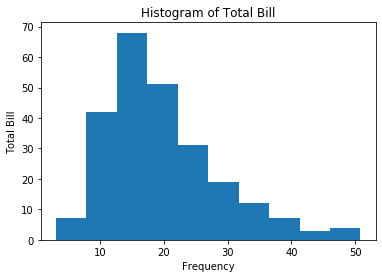

In [3]:
fig = plt.figure()
axes1 = fig.add_subplot(1, 1, 1)
axes1.hist(tips['total_bill'], bins=10)
axes1.set_title('Histogram of Total Bill')
axes1.set_xlabel('Frequency')
axes1.set_ylabel('Total Bill')

## 3.4.1.1 Seaborn Histograms
Histograms are created using sns.distplot5 (Figure 3.12).

5. seaborn distplot documentation: https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot

## 3.4.1.2 Density Plot (Kernel Density Estimation)
Density plots are another way to visualize a univariate distribution (Figure 3.14). In essence, they are created by drawing a normal distribution centered at each data point, and then smoothing out the overlapping plots so that the area under the curve is 1.

## 3.4.1.3 Rug Plot
Rug plots are a one-dimensional representation of a variable’s distribution. They are typically used with other plots to enhance a visualization. Figure 3.15 shows a histogram overlaid with a density plot and a rug plot on the bottom.

Text(0.5, 1.0, 'Total Bill Rug Plot')

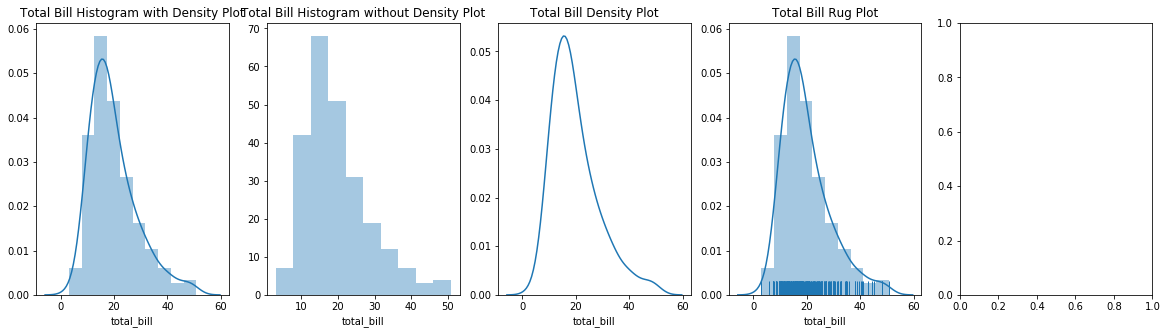

In [4]:
# this subplots function is a shortcut for
# creating separate figure objects and
# adding individual subplots (axes) to the figure
hist, axes = plt.subplots(1,5, figsize=(20,5))

# use the distplot function from seaborn to create our plot
sns.distplot(tips['total_bill'], bins=10, ax=axes[0])
axes[0].set_title('Total Bill Histogram with Density Plot')

sns.distplot(tips['total_bill'], bins=10, kde=False, ax=axes[1])
axes[1].set_title('Total Bill Histogram without Density Plot')

sns.distplot(tips['total_bill'], bins=10, hist=False, kde=True, ax=axes[2])
axes[2].set_title('Total Bill Density Plot')

sns.distplot(tips['total_bill'], bins=10, rug=True, ax=axes[3])
axes[3].set_title('Total Bill Rug Plot')

## 3.4.1.4 Count Plot (Bar Plot)

Bar plots are very similar to histograms, but instead of binning values to produce a distribution, bar plots can be used to count discrete variables. A count plot (Figure 3.16) is used for this purpose.

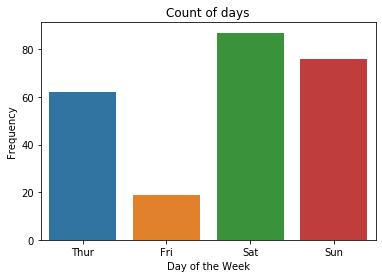

In [5]:
count, ax = plt.subplots()
ax = sns.countplot('day', data=tips)
ax.set_title('Count of days')
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Frequency')
plt.show()

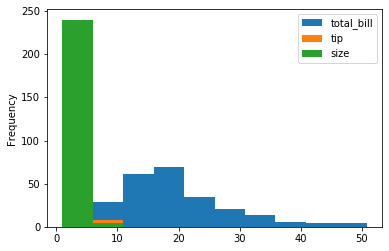

In [6]:
tips.plot.hist()

# 3.3.2 Bivariate
In statistics jargon, the term “bivariate” refers to a two variables.

## 3.3.2.1 Pyplot Scatterplot
Scatterplots are used when a continuous variable is plotted against another continuous variable (Figure 3.9).

Text(0, 0.5, 'Tip')

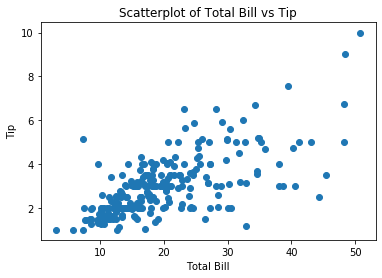

In [7]:
scatter_plot = plt.figure()
axes1 = scatter_plot.add_subplot(1, 1, 1)
axes1.scatter(tips['total_bill'], tips['tip'])
axes1.set_title('Scatterplot of Total Bill vs Tip')
axes1.set_xlabel('Total Bill')
axes1.set_ylabel('Tip')

## 3.4.2.1 Seaborn Scatterplot

There are a few ways to create a scatterplot in seaborn. There is no explicit function named scatter. Instead, we use regplot. It will plot a scatterplot and also fit a regression line. If we set fit_reg=False, the visualization will show only the scatterplot (Figure 3.17).

A similar function, lmplot, can also create scatterplots. Internally, lmplot calls regplot, so regplot is a more general plotting function. The main difference is that regplot creates axes (Figure 3.6) whereas lmplot creates a figure (Figure 3.18).

Text(0, 0.5, 'Tip')

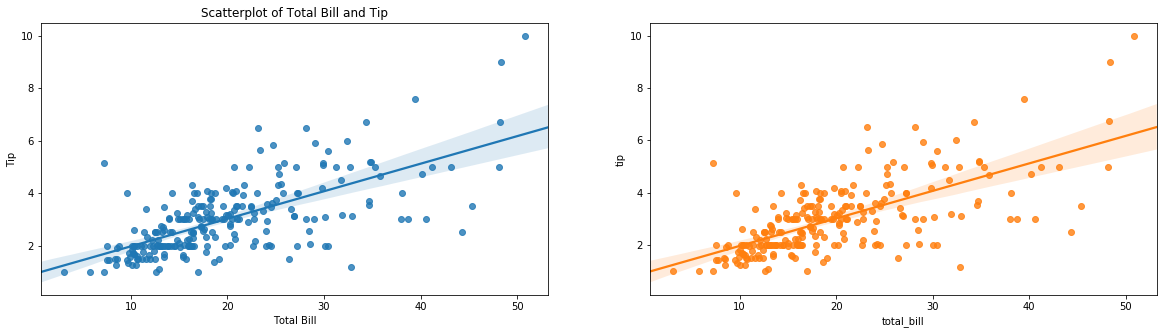

In [8]:
scatter, axes = plt.subplots(1,2, figsize=(20,5))

sns.regplot(x='total_bill', y='tip', data=tips, ax=axes[0])
axes[0].set_title('Scatterplot of Total Bill and Tip')
axes[0].set_xlabel('Total Bill')
axes[0].set_ylabel('Tip')

sns.regplot(x='total_bill', y='tip', data=tips, ax=axes[1])
axes[0].set_title('Scatterplot of Total Bill and Tip')
axes[0].set_xlabel('Total Bill')
axes[0].set_ylabel('Tip')

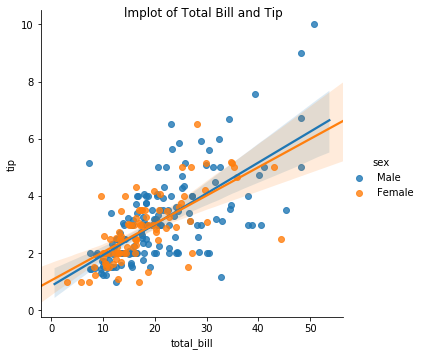

In [9]:
# NOTE: lmplot doesn't work well with axes[1]
# NOTE: lmplot works with hue='sex', but regplot doesn't
fig = sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex')
fig.fig.suptitle('lmplot of Total Bill and Tip')
plt.show()

We can also create a scatterplot that includes a univariate plot on each axis using jointplot (Figure 3.19). One major difference is that jointplot does not return axes, so we do not need to create a figure with axes on which to place our plot. Instead, this function creates a JointGrid object.

Text(0.5, 1.03, 'Joint Plot of Total Bill and Tip')

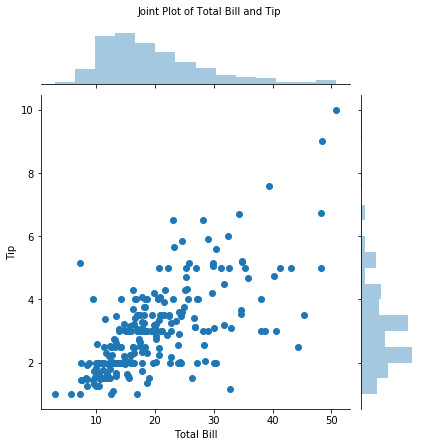

In [10]:
joint = sns.jointplot(x='total_bill', y='tip', data=tips)
joint.set_axis_labels(xlabel='Total Bill', ylabel='Tip')

# add a title, set font size,
# and move the text above the total bill axes
joint.fig.suptitle('Joint Plot of Total Bill and Tip', fontsize=10, y=1.03)

## 3.4.2.2 Hexbin Plot
Scatterplots are great for comparing two variables. However, sometimes there are too many points for a scatterplot to be meaningful. One way to get around this issue is to bin points on the plot together. Just as histograms can bin a variable to create a bar, so hexbin can bin two variables (Figure 3.20). A hexagon is used for this purpose because it is the most efficient shape to cover an arbitrary 2D surface. This is an example of seaborn building on top of matplotlib, as hexbin is a matplotlib function.

Text(0.5, 1.03, 'Hexbin Joint Plot of Total Bill and Tip')

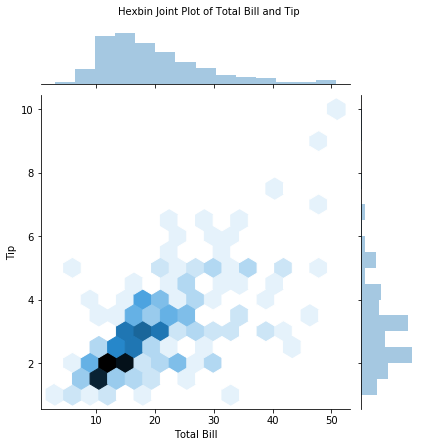

In [11]:
hexbin = sns.jointplot(x="total_bill", y="tip", data=tips, kind="hex")
hexbin.set_axis_labels(xlabel='Total Bill', ylabel='Tip')
hexbin.fig.suptitle('Hexbin Joint Plot of Total Bill and Tip', fontsize=10, y=1.03)

## 3.4.2.3 2D Density Plot

You can also create a 2D kernel density plot. This kind of process is similar to how sns.kdeplot works, except it creates a density plot across two variables. The bivariate plot can be shown on its own (Figure 3.21), or you can place the two univariate plots next to each other using jointplot (Figure 3.22).

Text(0, 0.5, 'Tip')

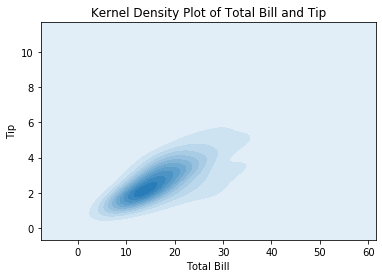

In [12]:
kde, ax = plt.subplots()
sns.kdeplot(data=tips['total_bill'],
            data2=tips['tip'],
            shade=True) # shade will fill in the contours

ax.set_title('Kernel Density Plot of Total Bill and Tip')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')

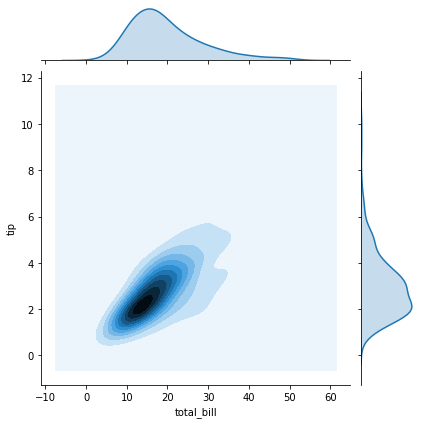

In [13]:
# NOTE: jointplot using ax=axes[1] causes the 2D density plot to be seperated from the 1D density axes
kde_joint = sns.jointplot(x='total_bill', y='tip', data=tips, kind='kde')

# 3.3.2.2 Boxplot

Boxplots are used when a discrete variable is plotted against a continuous variable (Figure 3.10).

Text(0, 0.5, 'Tip')

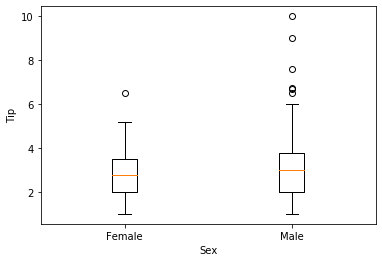

In [14]:
boxplot = plt.figure()
axes1 = boxplot.add_subplot(1, 1, 1)
axes1.boxplot(
    # first argument of boxplot is the data
    # since we are plotting multiple pieces of data
    # we have to put each piece of data into a list
    [
        tips[tips['sex'] == 'Female']['tip'],
        tips[tips['sex'] == 'Male']['tip']
    ],
    # we can then pass in an optional labels parameter
    # to label the data we passed
    labels=['Female', 'Male']
)
axes1.set_xlabel('Sex')
axes1.set_ylabel('Tip')
##axes1.set_title('Boxplot of Tips by Sex')

## 3.4.2.5 Seaborn Boxplot
Unlike the previously mentioned plots, a boxplot (Figure 3.24) shows multiple statistics: the minimum, first quartile, median, third quartile, maximum, and, if applicable, outliers based on the interquartile range.

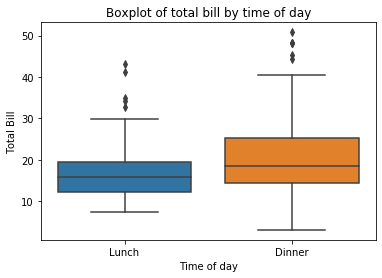

In [15]:
box, ax = plt.subplots()
ax = sns.boxplot(x='time', y='total_bill', data=tips)
ax.set_title('Boxplot of total bill by time of day')
ax.set_xlabel('Time of day')
ax.set_ylabel('Total Bill')
plt.show()

## 3.4.2.4 Bar Plot
Bar Plots can also be used to show multiple variables. By default, barplot will calculate a mean (Figure 3.23), but you can pass any function into the estimator parameter. For example, you could pass in the numpy.std function to calculate the standard deviation.

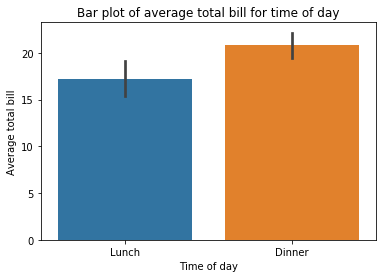

In [16]:
bar, ax = plt.subplots()
ax = sns.barplot(x='time', y='total_bill', data=tips)
ax.set_title('Bar plot of average total bill for time of day')
ax.set_xlabel('Time of day')
ax.set_ylabel('Average total bill')
plt.show()

## 3.4.2.6 Violin Plot
Boxplots are a classical statistical visualization, but they can obscure the underlying distribution of the data. Violin plots (Figure 3.25) are able to show the same values as a boxplot, but plot the “boxes” as a kernel density estimation. This can help retain more visual information about your data since only plotting summary statistics can be misleading, as seen by the Anscombe quartet.

Text(0, 0.5, 'Total Bill')

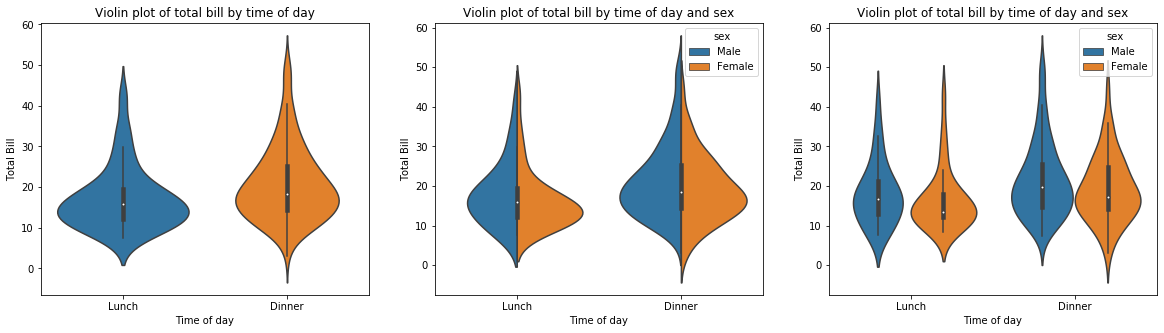

In [17]:
violin, axes = plt.subplots(1,3, figsize=(20,5))

sns.violinplot(x='time', y='total_bill', 
               data=tips, 
               ax=axes[0])
axes[0].set_title('Violin plot of total bill by time of day')
axes[0].set_xlabel('Time of day')
axes[0].set_ylabel('Total Bill')

sns.violinplot(x='time', y='total_bill',
               hue='sex', data=tips,
               split=True,
               ax=axes[1])
axes[1].set_title('Violin plot of total bill by time of day and sex')
axes[1].set_xlabel('Time of day')
axes[1].set_ylabel('Total Bill')

sns.violinplot(x='time', y='total_bill',
               hue='sex', data=tips,
               split=False,
               ax=axes[2])
axes[2].set_title('Violin plot of total bill by time of day and sex')
axes[2].set_xlabel('Time of day')
axes[2].set_ylabel('Total Bill')

## 3.3.3 Multivariate Data

Plotting multivariate data is tricky, because there isn’t a panacea or template that can be used for every case. To illustrate the process of plotting multivariate data, let’s build on our earlier scatterplot. If we wanted to add another variable, say sex, one option would be to color the points based on the value of the third variable.

If we wanted to add a fourth variable, we could add size to the dots. The only caveat with using size as a variable is that humans are not very good at differentiating areas. Sure, if there’s an enormous dot next to a tiny one, your point will be conveyed, but smaller differences are difficult to distinguish, and may add clutter to your visualization. One way to reduce clutter is to add some value of transparency to the individual points, such that many overlapping points will show a darker region of a plot than less crowded areas.

The general rule of thumb is that different colors are much easier to distinguish than changes in size. If you have to use areas to convey differences in values, be sure that you are actually plotting relative areas. A common pitfall is to map a value to the radius of a circle for plots, but since the formula for a circle is πr2, your areas are actually based on a squared scale. That is not only misleading, but also wrong.

Colors are also difficult to pick. Humans do not perceive hues on a linear scale, so you need to think carefully when picking color palettes. Luckily matplotlib2 and seaborn3 come with their own set of color palettes, and tools like colorbrewer4 can help you pick good color palettes.

2. matplotlib colormaps: http://matplotlib.org/users/colormaps.html

3. seaborn color palettes: http://stanford.edu/~mwaskom/software/seaborn-dev/tutorial/color_palettes.html

4. colorbrewer color palettes http://colorbrewer2.org/

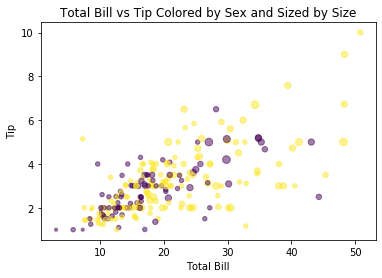

In [18]:
# create a color variable based on sex
def recode_sex(sex):
    if sex == 'Female':
       return 0
    else:
       return 1


tips['sex_color'] = tips['sex'].apply(recode_sex)


scatter_plot = plt.figure()
axes1 = scatter_plot.add_subplot(1, 1, 1)
axes1.scatter(
    x=tips['total_bill'],
    y=tips['tip'],

    # set the size of the dots based on party size
    # we multiply the values by 10 to make the points bigger
    # and to emphasize the differences
    s=tips['size'] * 10,

    # set the color for the sex
    c=tips['sex_color'],

    # set the alpha value so points are more transparent
    # this helps with overlapping points
    alpha=0.5)


axes1.set_title('Total Bill vs Tip Colored by Sex and Sized by Size')
axes1.set_xlabel('Total Bill')
axes1.set_ylabel('Tip')

tips.drop(['sex_color'], axis=1, inplace=True)

# 3.4.2.7 Pairwise Relationships
https://seaborn.pydata.org/tutorial/categorical.html

When you have mostly numeric data, visualizing all of the pairwise relationships can be easily performed using pairplot. This function will plot a scatterplot between each pair of variables, and a histogram for the univariate data (Figure 3.26).

In [19]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


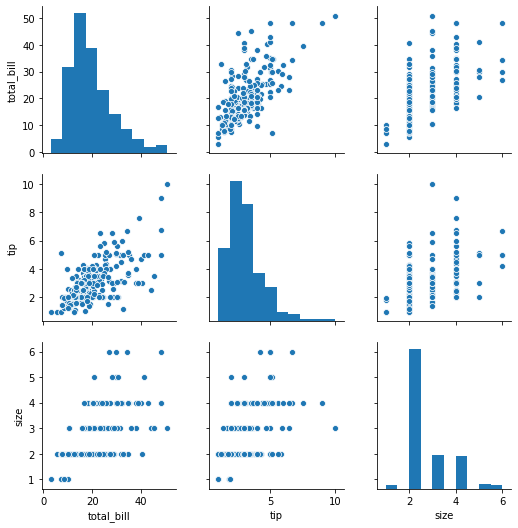

In [20]:
fig = sns.pairplot(tips)

One drawback when using pairplot is that there is redundant information; that is, the top half of the the visualization is the same as the bottom half. We can use pairgrid to manually assign the plots for the top half and bottom half. This plot is shown in Figure 3.27.

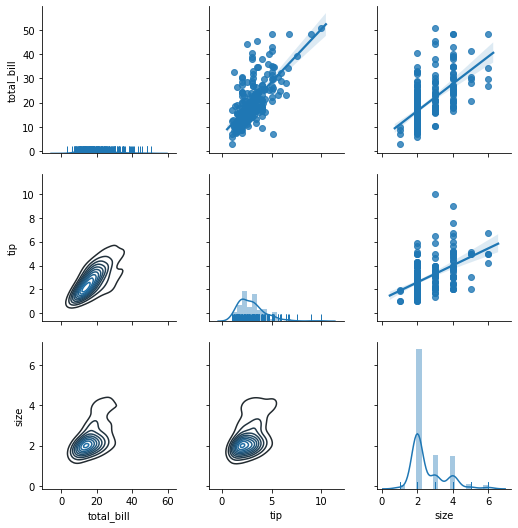

In [21]:
pair_grid = sns.PairGrid(tips)

# we can use plt.scatter instead of sns.regplot
pair_grid = pair_grid.map_upper(sns.regplot)
pair_grid = pair_grid.map_lower(sns.kdeplot)
pair_grid = pair_grid.map_diag(sns.distplot, rug=True)

plt.show()

## 3.4.3.3 Facets

What if we want to show more variables? Or if we know which plot we want for our visualization, but we want to make multiple plots over a categorical variable? Facets are designed to meet these needs. Instead of you needing to individually subset data and lay out the axes in a figure (as we did in Figure 3.5), facets in seaborn can handle this work for you.

To use facets, your data needs to be what Hadley Wickham[7] calls “Tidy Data,”[8] where each row represents an observation in the data, and each column is a variable (also known as “long data”).

7. http://hadley.nz/

8. http://vita.had.co.nz/papers/tidy-data.pdf

Figure 3.33 shows a re-creation of the Anscombe quartet data from Figure 3.5 in seaborn.

In [22]:
anscombe = sns.load_dataset("anscombe")
anscombe.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


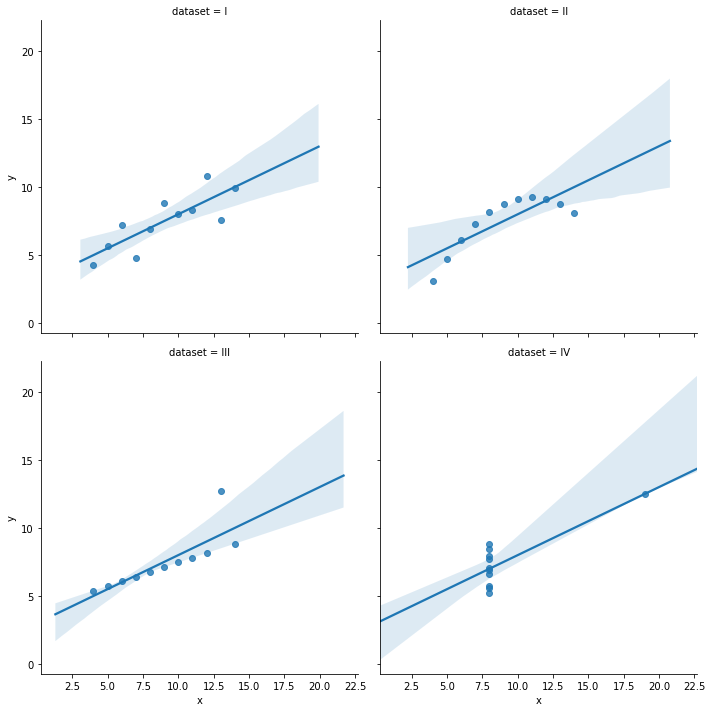

In [23]:
anscombe_plot = sns.lmplot(x='x', y='y', data=anscombe,
                           fit_reg=True,
                           col='dataset', col_wrap=2)

The individual facets need not be univariate plots, as seen in Figure 3.35.

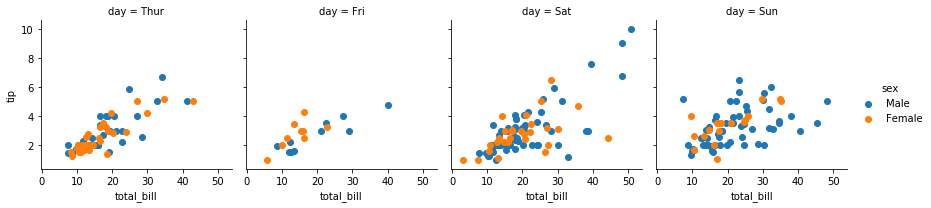

In [24]:
facet = sns.FacetGrid(tips, col='day', hue='sex')
facet = facet.map(plt.scatter, 'total_bill', 'tip')
facet = facet.add_legend()
plt.show()

Another thing you can do with facets is to have one variable be faceted on the x-axis, and another variable faceted on the y-axis. We accomplish this by passing a row parameter. The result is shown in Figure 3.37.

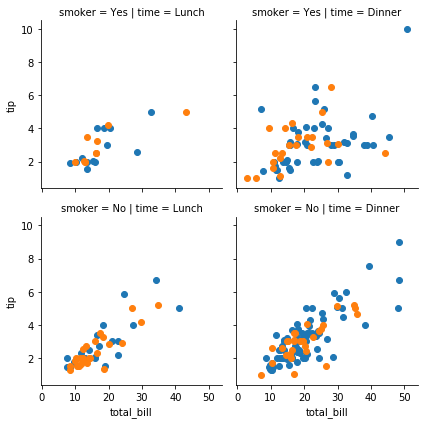

In [25]:
facet = sns.FacetGrid(tips, col='time', row='smoker', hue='sex')
facet.map(plt.scatter, 'total_bill', 'tip')
plt.show()

If you do not want all of the hue elements to overlap (i.e., you want this behavior in scatterplots, but not violin plots), you can use the sns.factorplot function. The result is shown in Figure 3.38.

https://seaborn.pydata.org/tutorial/axis_grids.html

/Users/jamie/Dropbox/Programming/aspiration-ai-internship/python3/venv/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


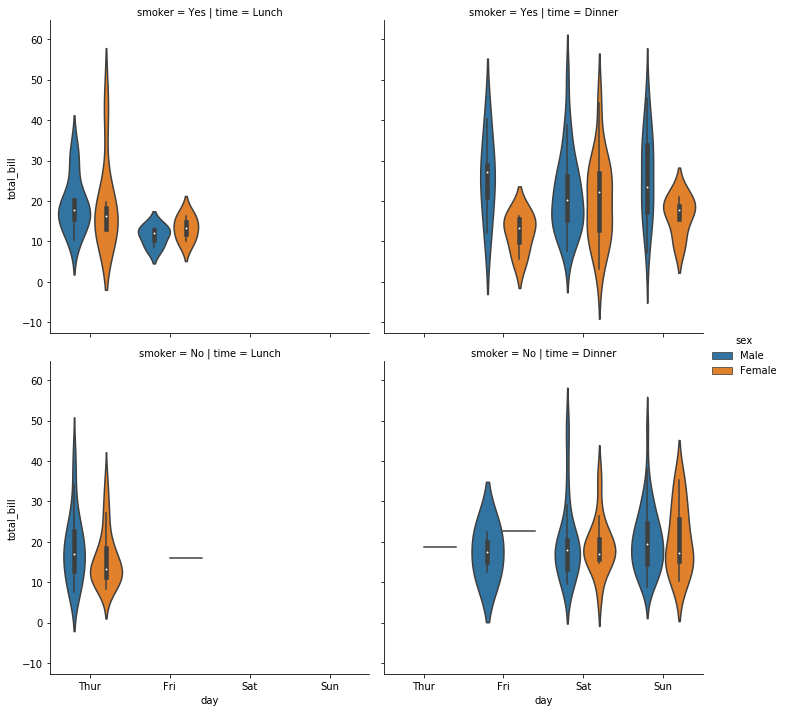

In [26]:
facet = sns.factorplot(x='day', y='total_bill', hue='sex', data=tips,
                       row='smoker', col='time', kind='violin')

# 3.5 PANDAS OBJECTS

Pandas objects also come equipped with their own plotting functions. Just as in seaborn, the plotting functions built into Pandas are just wrappers around matplotlib with preset values.

In general, plotting using Pandas follows the DataFrame.plot.PLOT_TYPE or Series.plot.PLOT_TYPE functions.



In [27]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Pandas.plot API

- DataFrame.plot([x, y, kind, ax, ….])	DataFrame plotting accessor and method
- DataFrame.plot.area(self[, x, y])	Draw a stacked area plot.
- DataFrame.plot.bar(self[, x, y])	Vertical bar plot.
- DataFrame.plot.barh(self[, x, y])	Make a horizontal bar plot.
- DataFrame.plot.box(self[, by])	Make a box plot of the DataFrame columns.
- DataFrame.plot.density(self[, bw_method, ind])	Generate Kernel Density Estimate plot using Gaussian kernels.
- DataFrame.plot.hexbin(self, x, y[, C, …])	Generate a hexagonal binning plot.
- DataFrame.plot.hist(self[, by, bins])	Draw one histogram of the DataFrame’s columns.
- DataFrame.plot.kde(self[, bw_method, ind])	Generate Kernel Density Estimate plot using Gaussian kernels.
- DataFrame.plot.line(self[, x, y])	Plot Series or DataFrame as lines.
- DataFrame.plot.pie(self, \*\*kwargs)	Generate a pie plot.
- DataFrame.plot.scatter(self, x, y[, s, c])	Create a scatter plot with varying marker point size and color.
- DataFrame.boxplot(self[, column, by, ax, …])	Make a box plot from DataFrame columns.
- DataFrame.hist(data[, column, by, grid, …])	Make a histogram of the DataFrame’s.

https://pandas.pydata.org/pandas-docs/stable/reference/frame.html#plotting
https://pandas.pydata.org/pandas-docs/version/0.23/api.html#api-dataframe-plotting

Text(0.5, 1.0, '.plot.line()')

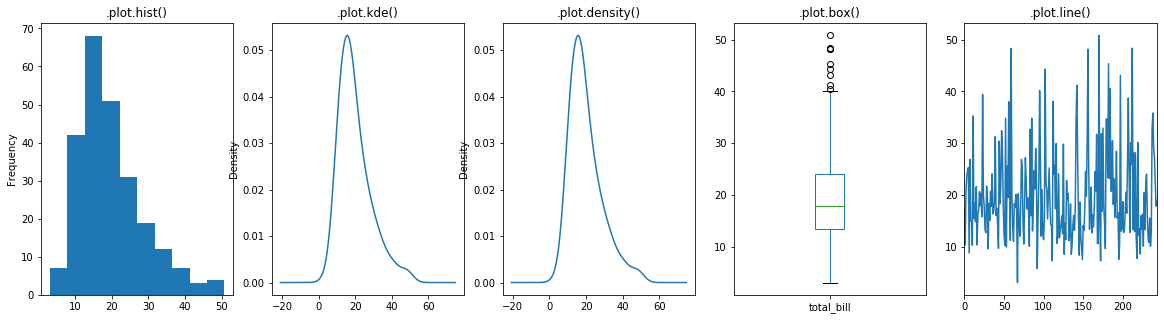

In [28]:
hist, axes = plt.subplots(1,5, figsize=(20,5))

tips['total_bill'].plot.hist(bins=10, ax=axes[0])  # no rug= or kde= options
axes[0].set_title('.plot.hist()')

tips['total_bill'].plot.kde(ax=axes[1]) 
axes[1].set_title('.plot.kde()')

tips['total_bill'].plot.density(ax=axes[2]) 
axes[2].set_title('.plot.density()')

tips['total_bill'].plot.box(ax=axes[3]) 
axes[3].set_title('.plot.box()')

tips['total_bill'].plot.line(ax=axes[4]) 
axes[4].set_title('.plot.line()')

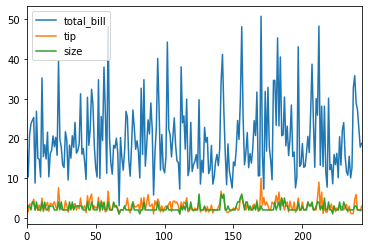

In [29]:
# hist, axes = plt.subplots(3,5, figsize=(20,5))

tips.plot()

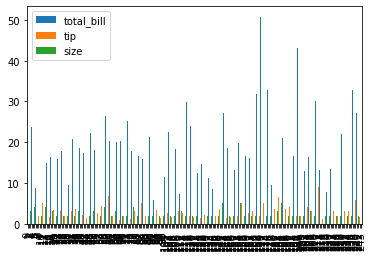

In [30]:
tips.plot.bar()

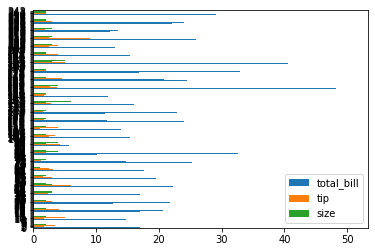

In [31]:
tips.plot.barh()

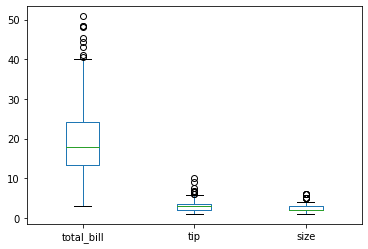

In [32]:
tips.plot.box()

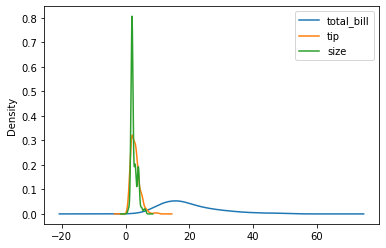

In [33]:
tips.plot.density()

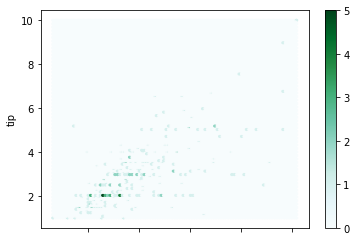

In [34]:
tips.plot.hexbin(x="total_bill",y="tip")

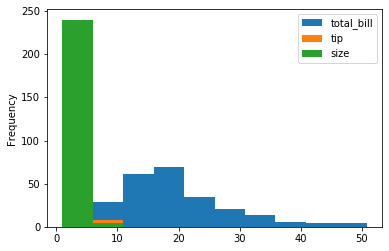

In [35]:
tips.plot.hist()

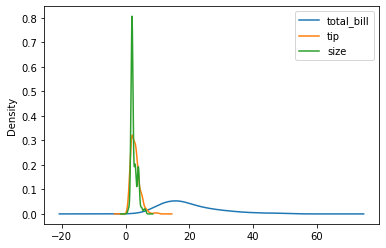

In [36]:
tips.plot.kde()

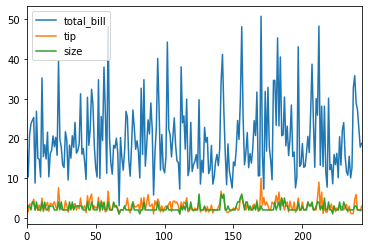

In [37]:
tips.plot.line()

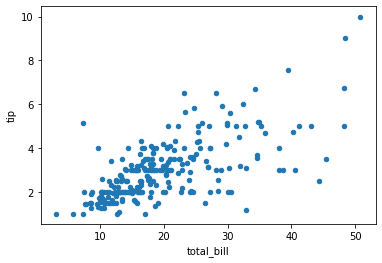

In [38]:
tips.plot.scatter(x="total_bill",y="tip")

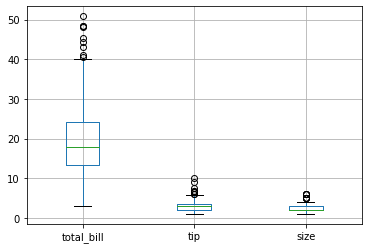

In [39]:
tips.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12bc7ffd0>,
      dtype=object)

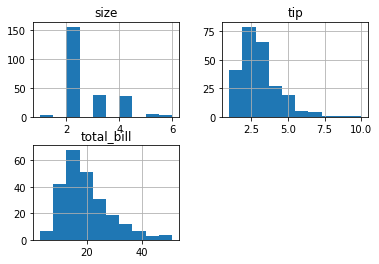

In [40]:
tips.hist()

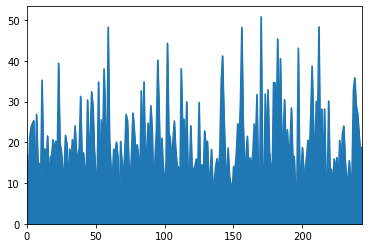

In [41]:
tips['total_bill'].plot.area()

In [42]:
tips.plot.pie(y='smoker')  # ValueError: new categories must not include old categories: {'Unknown'}

ValueError: fill value must be in categories